- Error bars (so need sem array to pass into yerr=)
- titles and labels
- 3 trends
...
- maybe recode the mouse_id to be an integer? 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
drugsdf = pd.read_csv('raw_data/mouse_drug_data.csv')
tumors = pd.read_csv('raw_data/clinicaltrial_data.csv')

## Preprocessing

In [3]:
data = pd.merge(drugsdf, tumors, how='inner')

In [4]:
data.shape

(1906, 5)

In [5]:
data = data.rename(columns={\
                            'Mouse ID': 'mouse_id',\
                            'Tumor Volume (mm3)': 'tumor_vol',\
                            'Metastatic Sites': 'mets'})

In [6]:
##filter for drugs of interest
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
mask_drugs = data['Drug'].isin(drugs)
data_drugs = data[mask_drugs]

## Tumor Volume
Scatter plot: tumor volume changes over time for each treatment 

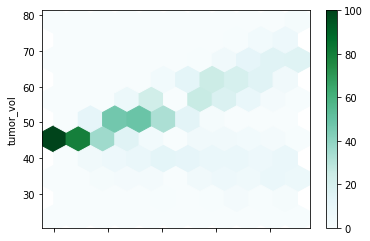

In [7]:
data_drugs.plot.hexbin(x = "Timepoint", y = 'tumor_vol', gridsize=10);

In [8]:
capomulin = data[data.Drug == "Capomulin"]
infubinol = data[data.Drug == "Infubinol"]
ketapril = data[data.Drug == "Ketapril"]
placebo = data[data.Drug == "Placebo"]

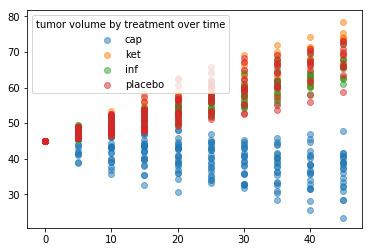

In [9]:
#make subplots? facetgrid? 
plt.scatter(capomulin.Timepoint, capomulin.tumor_vol, label='cap', alpha=0.5)
plt.scatter(ketapril.Timepoint, ketapril.tumor_vol, label='ket', alpha=0.5)
plt.scatter(infubinol.Timepoint, infubinol.tumor_vol, label='inf', alpha=0.5)
plt.scatter(placebo.Timepoint, placebo.tumor_vol, label='placebo', alpha=0.5)
plt.legend(loc='best', title='tumor volume by treatment over time', fancybox=True)

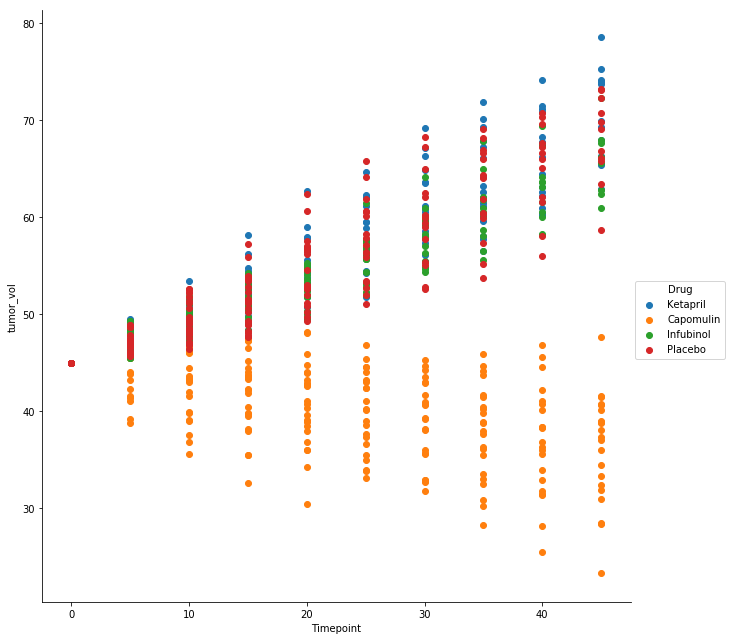

In [10]:
sns.FacetGrid(data_drugs, hue="Drug", size=9,) \
   .map(plt.scatter, "Timepoint", "tumor_vol") \
   .add_legend();

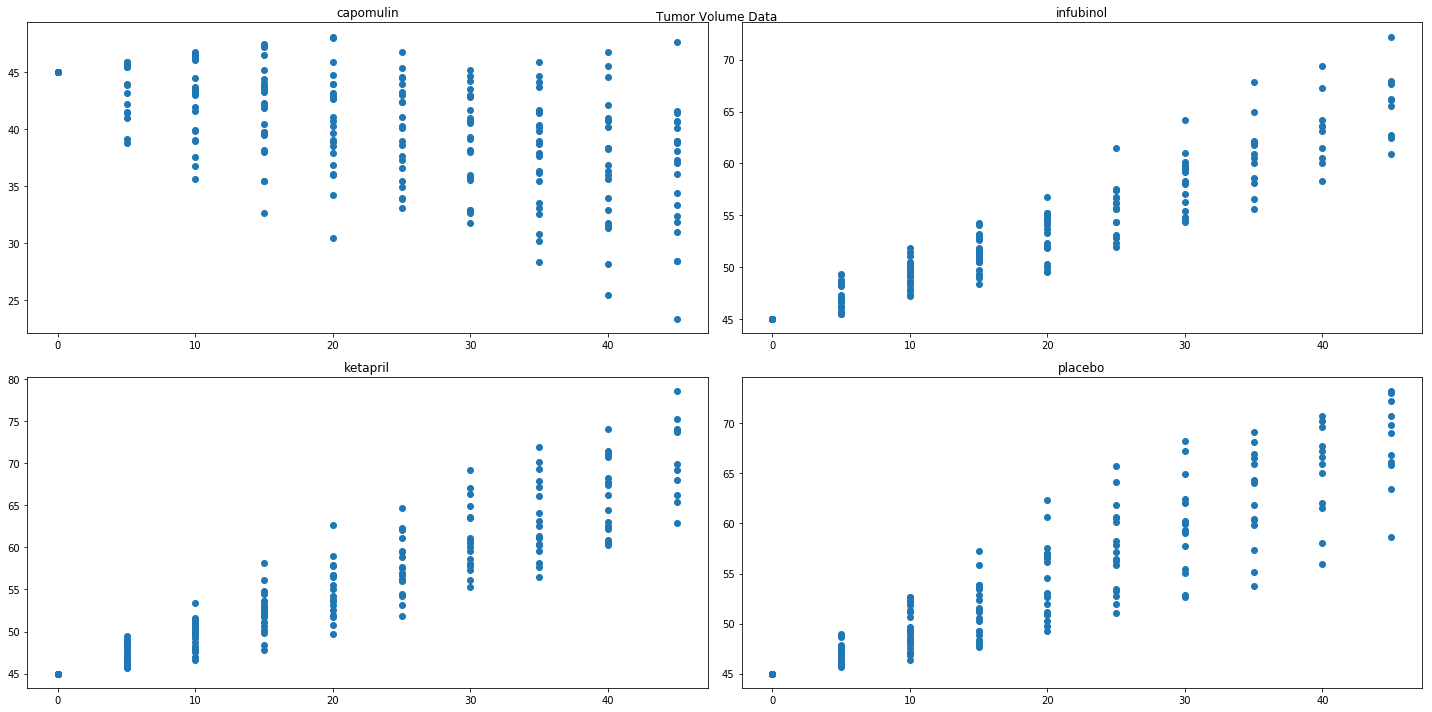

In [12]:
tumorfig = plt.figure(figsize=(20, 10))

axes1 = tumorfig.add_subplot(2, 2, 1)
axes2 = tumorfig.add_subplot(2, 2, 2)
axes3 = tumorfig.add_subplot(2, 2, 3)
axes4 = tumorfig.add_subplot(2, 2, 4)

# add a plot to each of the axes created above
axes1.plot(capomulin['Timepoint'], capomulin['tumor_vol'], 'o')
axes2.plot(infubinol['Timepoint'], infubinol['tumor_vol'], 'o')
axes3.plot(ketapril['Timepoint'], ketapril['tumor_vol'], 'o')
axes4.plot(placebo['Timepoint'], placebo['tumor_vol'], 'o')

# add a small title to each subplot

axes1.set_title("capomulin")
axes2.set_title("infubinol")
axes3.set_title("ketapril")
axes4.set_title("placebo")


tumorfig.suptitle("Tumor Volume Data")

tumorfig.tight_layout()

## METASTASES
METS Scatter plot: number of metastatic sites - changes over time for each treatment

In [13]:
data_drugs['met_diffs'] = data_drugs.groupby('mouse_id')['mets'].diff().fillna(0)

/Users/jennifershurley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
data_drugs.tail(15)

mouse_id     Drug  Timepoint  tumor_vol  mets  met_diffs
1891     q787  Placebo          0  45.000000     0        0.0
1892     q787  Placebo          5  47.116616     0        0.0
1893     q787  Placebo         10  48.593862     1        1.0
1894     q787  Placebo         15  49.217732     2        1.0
1895     q787  Placebo         20  50.229934     2        0.0
1896     q787  Placebo         25  52.713188     2        0.0
1897     q787  Placebo         30  55.036206     2        0.0
1898     q787  Placebo         35  60.333852     3        1.0
1899     q787  Placebo         40  62.034127     3        0.0
1900     q787  Placebo         45  66.096475     3        0.0
1901     j235  Placebo          0  45.000000     0        0.0
1902     j235  Placebo          5  46.588820     0        0.0
1903     j235  Placebo         10  48.018788     1        1.0
1904     j235  Placebo         15  51.161138     1        0.0
1905     j235  Placebo         20  52.942902     1        0.0

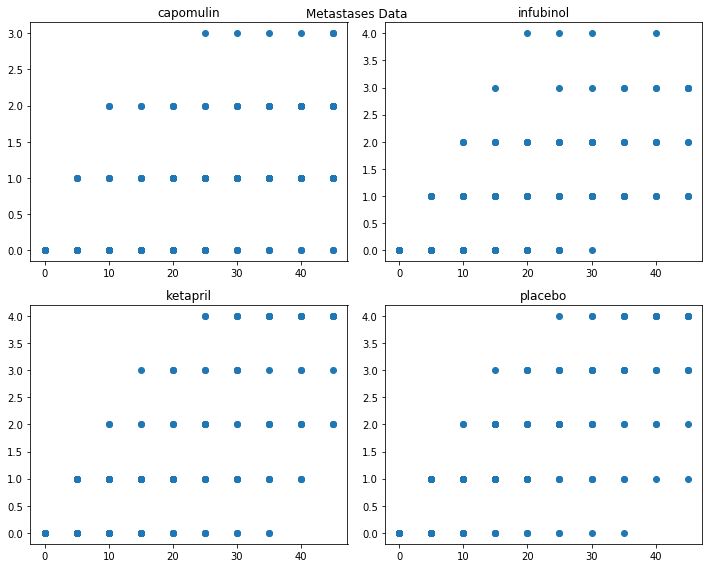

In [15]:
fig = plt.figure(figsize=(10, 8))

axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

# add a plot to each of the axes created above
axes1.plot(capomulin['Timepoint'], capomulin['mets'], 'o')
axes2.plot(infubinol['Timepoint'], infubinol['mets'], 'o')
axes3.plot(ketapril['Timepoint'], ketapril['mets'], 'o')
axes4.plot(placebo['Timepoint'], placebo['mets'], 'o')

# add a small title to each subplot

axes1.set_title("capomulin")
axes2.set_title("infubinol")
axes3.set_title("ketapril")
axes4.set_title("placebo")


fig.suptitle("Metastases Data")

fig.tight_layout()

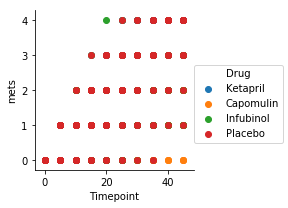

In [16]:
sns.FacetGrid(data_drugs, hue="Drug", size=3,) \
   .map(plt.scatter, "Timepoint", "mets") \
   .add_legend();
#this doesn't make any sense. need to calculate a change column? -- which I did. and it doesn't make sense either
#the overlap masks things so need subplots, maybe

## SURVIVAL RATE

SURVIVALRATE Scatter plot: number of mice still alive through the course of treatment (Survival Rate) ...
- ?one series is days since treatment and the other is % remaining
- ?see the Titanic kaggle thing? 
- "progression-free survival (PFS) statistics are more specific survival statistics.
percentage of people who donâ€™t have new tumor growth or cancer spread during or after treatment. The rates include those whose disease responded completely or partially to treatment. They also include those whose disease is stable. That means the cancer is still there but not growing or spreading."
- http://lifelines.readthedocs.io/en/latest/Survival%20analysis%20with%20lifelines.html


In [28]:
subjects = data_drugs.groupby('mouse_id')

In [29]:
subjects_time = subjects['Timepoint']

In [30]:
subjects_time.get_group('z581')

837     0
838     5
839    10
840    15
841    20
842    25
843    30
844    35
845    40
846    45
Name: Timepoint, dtype: int64

In [31]:
subjects.first().head()
#use enumerate to give each subject an integer index? 
#subjects['index']enumerate() for s in subjects

Drug  Timepoint  tumor_vol  mets  met_diffs
mouse_id                                                  
a203      Infubinol          0       45.0     0        0.0
a251      Infubinol          0       45.0     0        0.0
a262        Placebo          0       45.0     0        0.0
a457       Ketapril          0       45.0     0        0.0
a577      Infubinol          0       45.0     0        0.0

In [32]:
subjects.last().head()

Drug  Timepoint  tumor_vol  mets  met_diffs
mouse_id                                                  
a203      Infubinol         45  67.973419     2        0.0
a251      Infubinol         45  65.525743     1        0.0
a262        Placebo         45  70.717621     4        0.0
a457       Ketapril         10  49.783419     0        0.0
a577      Infubinol         30  57.031862     2        0.0

In [33]:
subjects_time.get_group('a457')

434     0
435     5
436    10
Name: Timepoint, dtype: int64

In [34]:
tumor_vol_change_per_mouse = subjects.tumor_vol.last() - subjects.tumor_vol.first() 

In [35]:
tumor_vol_change_per_mouse.head()

mouse_id
a203    22.973419
a251    20.525743
a262    25.717621
a457     4.783419
a577    12.031862
Name: tumor_vol, dtype: float64

In [36]:
type(tumor_vol_change_per_mouse)
#join with the drug dataframe

pandas.core.series.Series

In [37]:
tumor_vol_change_per_mouse = tumor_vol_change_per_mouse.to_frame()

In [39]:
tumor_vol_change_per_mouse.head()

tumor_vol
mouse_id           
a203      22.973419
a251      20.525743
a262      25.717621
a457       4.783419
a577      12.031862

In [41]:
drugsdf = drugsdf.rename(columns={'Mouse ID': 'mouse_id',})

In [47]:
drugsdf = drugsdf.sort_values('mouse_id')

In [48]:
drugsdf.head()

mouse_id       Drug
115     a203  Infubinol
102     a251  Infubinol
247     a262    Placebo
142     a275   Ceftamin
23      a366   Stelasyn

In [49]:
# tumor_vol_drug_data = pd.merge(drugsdf, tumor_vol_change_per_mouse, on='mouse_id')
#key error on mouse_id??
#try to get drug another way? 

KeyError: 'mouse_id'

## Bar Graph - total % tumor volume change for each drug across the full 45 days.
- x = time
- color = drug
- y = tumor volume change (so there is a calculation to be done on df before plotting)
- groupby drug. sum all the changes -- OR SHOULD IT BE MAX - MIN, or last value(Timepoint[9]) minus first[0]?
- pull those values into series, zip, do the operation?

In [ ]:
data_drugs.head()

In [ ]:
time_zeros = data_drugs.query('Timepoint == 0')

In [ ]:
time_zeros.shape

In [ ]:
time_end = data_drugs.query('Timepoint == 45')
#this isn't going to help because it will have a different shape and doesn't account for the tumor volume changes for nonsurvivors

In [ ]:
data_drugs.groupby('Drug')['tumor_vol'].sum()